In [1]:
import networkx as nx

In [35]:
elist = create_uniform_graph(16,1.3)
elist

[(0, 7),
 (2, 1),
 (2, 5),
 (3, 1),
 (3, 15),
 (4, 4),
 (5, 10),
 (6, 5),
 (6, 14),
 (7, 7),
 (7, 14),
 (8, 5),
 (10, 11),
 (11, 3),
 (13, 7),
 (14, 7),
 (14, 9),
 (15, 5),
 (15, 10),
 (15, 11),
 (15, 14)]

In [19]:
x = nx.Graph()
x = x.add_edges_from(elist)
x

In [17]:
x.edges

AttributeError: 'NoneType' object has no attribute 'edges'

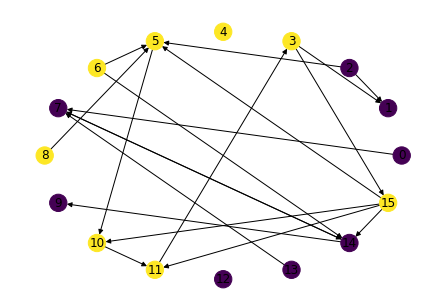

In [53]:
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph()
colors = []
for i in range(16):
    if(np.random.rand() < 0.5):
        colors.append(0)
    else:
        colors.append(1)
    G.add_node(i, weight=weight)
G.add_edges_from(elist)
nx.draw(G, pos=nx.circular_layout(G), node_color=colors, cmap=plt.get_cmap('viridis'), vmin=0, vmax=1, with_labels=True)

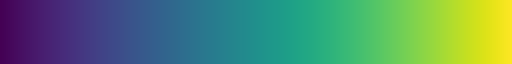

In [43]:
G = nx.DiGraph()
colors = []
for i in range(16):
    if(np.random.rand() < 0.5):
        colors.append(0)
    else:
        colors.append(1)
    G.add_node(i, weight=weight)
G.add_edges_from(elist)
nx.draw(G, pos=nx.circular_layout(G), node_color=colors, cmap=plt.get_cmap('viridis'), vmin=0, vmax=1, with_labels=True)

In [54]:
G.adjacency()